In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from keras import optimizers
import pandas as pd
import itertools
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
Train_Path = '../input/cats-and-dogs/Cats_and_Dogs/training_set/training_set/'
Test_Path = '../input/cats-and-dogs/Cats_and_Dogs/test_set/test_set/'

In [4]:
X_train = []
Y_train = []
X_test = []
Y_test = []

train_dir = []
test_dir = []

for labels in os.listdir(Train_Path):
    path_1 = os.path.join(Train_Path, labels)
    for images in os.listdir(path_1):
        path_2 = os.path.join(path_1, images)
        img = cv2.imread(path_2)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (128,128), interpolation = cv2.INTER_AREA)
        X_train.append(img)
        Y_train.append(labels)
        
for labels in os.listdir(Test_Path):
    path_1 = os.path.join(Test_Path, labels)
    for images in os.listdir(path_1):
        path_2 = os.path.join(path_1, images)
        img = cv2.imread(path_2)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (128,128), interpolation = cv2.INTER_AREA)
        X_test.append(img)
        Y_test.append(labels)

(8005, 128, 128, 3)
(8005,)
(2023, 128, 128, 3)
(2023,)


8005
8005
2023
2023


['cats' 'dogs'] 
 Number of classes 2


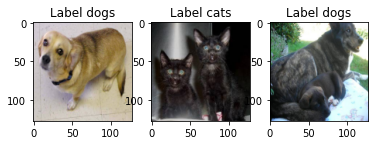

In [5]:
X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
print('\n')
print(len(X_train))
print(len(Y_train))
print(len(X_test))
print(len(Y_test))

plt.subplot(1,3,1)
plt.imshow(X_train[0])
plt.title('Label'+ ' ' + str(Y_train[0]))
plt.subplot(1,3,2)
plt.imshow(X_train[5000])
plt.title('Label'+ ' ' + str(Y_train[5000]))
plt.subplot(1,3,3)
plt.imshow(X_test[1000])
plt.title('Label'+ ' ' + str(Y_test[1000]))

print('\n')
print(str(np.unique(Y_train)) + ' \n ' + 'Number of classes' + ' ' + str(len(np.unique(Y_train))))


In [6]:
X_train = X_train / 255
X_test = X_test / 255

laben = LabelEncoder()
Y_train = laben.fit_transform(Y_train) # Converts the categorical label to (0,1)
Y_train = to_categorical(Y_train,2) # Converts that (0,1) in array form

Y_test = laben.fit_transform(Y_test) 
Y_test = to_categorical(Y_test,2) 

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(8005, 128, 128, 3)
(2023, 128, 128, 3)
(8005, 2)
(2023, 2)


In [6]:
model = Sequential()
model.add(Conv2D(128, (3, 3), padding='same',activation='relu', input_shape = (128,128,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))	
model.add(Dense(2, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 128)     3584      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 126, 126, 64)      73792     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 63, 63, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 31, 31, 64)        0

In [7]:
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [8]:
checkpoint = ModelCheckpoint('/kaggle/working/model.h5',
                             monitor = 'val_loss',
                             mode = 'min',
                             save_best_only=True,
                             verbose = 1
                            )

callbacks = [checkpoint]

In [ ]:
history = model.fit(X_train, Y_train,
                   epochs = 50,
                   validation_data = (X_test, Y_test),
                   batch_size=16,
                  callbacks = callbacks)
                   
model.save('/kaggle/working/model_1.h5')

Epoch 1/50
501/501 [==============================] - ETA: 0s - loss: 0.6688 - accuracy: 0.5764
Epoch 00001: val_loss improved from inf to 0.64718, saving model to /kaggle/working/model.h5
501/501 [==============================] - 15s 30ms/step - loss: 0.6688 - accuracy: 0.5764 - val_loss: 0.6472 - val_accuracy: 0.6031
Epoch 2/50
500/501 [============================>.] - ETA: 0s - loss: 0.6055 - accuracy: 0.6733
Epoch 00002: val_loss improved from 0.64718 to 0.56299, saving model to /kaggle/working/model.h5
501/501 [==============================] - 15s 29ms/step - loss: 0.6053 - accuracy: 0.6735 - val_loss: 0.5630 - val_accuracy: 0.7059
Epoch 3/50
500/501 [============================>.] - ETA: 0s - loss: 0.5627 - accuracy: 0.7075
Epoch 00003: val_loss improved from 0.56299 to 0.54624, saving model to /kaggle/working/model.h5
501/501 [==============================] - 15s 30ms/step - loss: 0.5627 - accuracy: 0.7074 - val_loss: 0.5462 - val_accuracy: 0.7202
Epoch 4/50
499/501 [======

Epoch 28/50
499/501 [============================>.] - ETA: 0s - loss: 0.2193 - accuracy: 0.9135
Epoch 00028: val_loss did not improve from 0.38201
501/501 [==============================] - 15s 30ms/step - loss: 0.2193 - accuracy: 0.9136 - val_loss: 0.3828 - val_accuracy: 0.8384
Epoch 29/50
499/501 [============================>.] - ETA: 0s - loss: 0.2238 - accuracy: 0.9108
Epoch 00029: val_loss did not improve from 0.38201
501/501 [==============================] - 15s 29ms/step - loss: 0.2238 - accuracy: 0.9109 - val_loss: 0.3999 - val_accuracy: 0.8369
Epoch 30/50
501/501 [==============================] - ETA: 0s - loss: 0.2206 - accuracy: 0.9054
Epoch 00030: val_loss did not improve from 0.38201
501/501 [==============================] - 14s 29ms/step - loss: 0.2206 - accuracy: 0.9054 - val_loss: 0.3946 - val_accuracy: 0.8384
Epoch 31/50
500/501 [============================>.] - ETA: 0s - loss: 0.2140 - accuracy: 0.9145
Epoch 00031: val_loss did not improve from 0.38201
501/501 [

In [1]:
from keras.models import load_model
model = load_model('/kaggle/working/model.h5')
# Load everything except model

In [11]:
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [12]:
checkpoint = ModelCheckpoint('/kaggle/working/model_1.h5',
                             monitor = 'val_loss',
                             mode = 'min',
                             save_best_only=True,
                             verbose = 1
                            )

callbacks = [checkpoint]

In [ ]:
history = model.fit(X_train, Y_train,
                   epochs = 50,
                   validation_data = (X_test, Y_test),
                   batch_size=16,
                  callbacks = callbacks)
                   
model.save('/kaggle/working/model_1.h5')

Epoch 1/50
500/501 [============================>.] - ETA: 0s - loss: 0.1884 - accuracy: 0.9270
Epoch 00001: val_loss improved from inf to 0.39797, saving model to /kaggle/working/model_1.h5
501/501 [==============================] - 15s 30ms/step - loss: 0.1883 - accuracy: 0.9270 - val_loss: 0.3980 - val_accuracy: 0.8458
Epoch 2/50
499/501 [============================>.] - ETA: 0s - loss: 0.1782 - accuracy: 0.9305
Epoch 00002: val_loss did not improve from 0.39797
501/501 [==============================] - 15s 29ms/step - loss: 0.1780 - accuracy: 0.9305 - val_loss: 0.4227 - val_accuracy: 0.8423
Epoch 3/50
500/501 [============================>.] - ETA: 0s - loss: 0.1754 - accuracy: 0.9325
Epoch 00003: val_loss improved from 0.39797 to 0.38767, saving model to /kaggle/working/model_1.h5
501/501 [==============================] - 15s 29ms/step - loss: 0.1753 - accuracy: 0.9325 - val_loss: 0.3877 - val_accuracy: 0.8423
Epoch 4/50
500/501 [============================>.] - ETA: 0s - loss

In [7]:
Score = model.evaluate(X_test,Y_test)
print(' Test Accuracy ', Score[1])

64/64 [==============================] - 1s 17ms/step - loss: 0.3671 - accuracy: 0.8512
 Test Accuracy  0.8512110710144043


In [8]:
y_test_ = np.argmax(Y_test, axis=1)
y_pred_ = model.predict_classes(X_test)

In [10]:
print('Classification Report \n')
print(classification_report(y_test_, y_pred_, target_names = ['Cat','Dog']))

Classification Report 

              precision    recall  f1-score   support

         Cat       0.86      0.84      0.85      1011
         Dog       0.84      0.86      0.85      1012

    accuracy                           0.85      2023
   macro avg       0.85      0.85      0.85      2023
weighted avg       0.85      0.85      0.85      2023



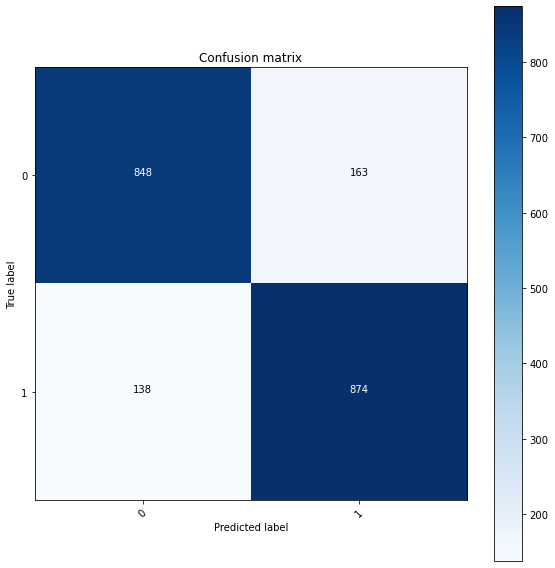

In [12]:
plt.figure(figsize=(5,5))

classes = 2
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


confusion_mtx = confusion_matrix(y_test_, y_pred_) 
plot_confusion_matrix(confusion_mtx, classes = range(2)) 